In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as adjust
import PIL
from PIL import Image
import matplotlib

import Loading_imgs
import Models
import Data_pre_processing

### Loading images

In [2]:
train_imgs = Loading_imgs.loading_imgs('dataset/train')
test_imgs = Loading_imgs.loading_imgs('dataset/test')

### Data Pre-processing

In [3]:
to_Tensor = transforms.ToTensor()
to_pil_image = transforms.ToPILImage()

#fix random parameters
np.random.seed(0)
train_length, weight, height = len(train_imgs), train_imgs[0][0].shape[1], train_imgs[0][0].shape[2]
#change the parameters of images
train_parameter, train_parameter_T = Data_pre_processing.parameter_create(train_length)
train_imgs_adjusted = Data_pre_processing.parameter_adjust_loop(train_imgs, train_parameter, weight, height)

#create trainset
trainset = Data_pre_processing.dataset_preprocessing(train_imgs_adjusted, train_parameter_T)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size = 1,
                                          shuffle = True, num_workers = 2)

In [4]:
#test data per processing
test_length, weight, height = len(test_imgs), test_imgs[0][0].shape[1], test_imgs[0][0].shape[2]

np.random.seed(0)
test_parameter, test_parameter_T = Data_pre_processing.parameter_create(test_length)
test_imgs_adjusted = Data_pre_processing.parameter_adjust_loop(test_imgs, test_parameter, weight, height)
#create testset
test_imgs_mixed = Data_pre_processing.dataset_preprocessing(test_imgs_adjusted, test_parameter_T)

testloader_mixed = torch.utils.data.DataLoader(test_imgs_mixed, 
                                          batch_size = 1,
                                          shuffle = False, num_workers = 2)

In [5]:
num_parameter = 3
# Training a CNN
def train_model(epoch_numbers, net):
    loss_array = []
    loss_array = np.array(loss_array)
    # index = []
    # index = np.array(index)
    test_cost_array = np.array(loss_array)
    label_array = []
    label_array = np.array(label_array)

    for epoch in range(epoch_numbers): 
        _, test_loss, _ = evaluating_results(testloader_mixed, net)
        test_cost_array = np.append(test_cost_array, test_loss.mean())  
        for i, data in enumerate(trainloader, 0):
            # Get the inputs
            inputs, labels = data
            label_array = np.append(label_array,labels.data.numpy())
            #Zero the parameter gradients
            optimizer.zero_grad()
            # Forward + backward + optimize
            outputs = net.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            #save lose values
            loss_array = np.append(loss_array,loss.data.numpy())

        print(epoch)
        
    print('Finished Training')
    return loss_array, test_cost_array, label_array, net

#Testing a CNN
def evaluating_results(testloader, net):
    # Evaluating the results
    loss_array, output_array, label_array = [], [], []
    loss_array = np.array(loss_array)
    output_array, label_array = np.copy(loss_array), np.copy(loss_array)
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net.forward(inputs)
        loss = criterion(outputs, labels)
        loss_array = np.append(loss_array,loss.data.numpy())
        output_array = np.append(output_array,outputs.data.numpy())
        label_array = np.append(label_array,labels.numpy())

    output_array = output_array.reshape(-1, num_parameter)
    label_array = label_array.reshape(-1, num_parameter)
    return output_array, loss_array, label_array

### I. Training for 3 layer Net

#### 1.Model(3 layers, kernel size 3)

In [6]:
# Optimizer and Loss Function
epoch = 50
lr = 3e-4
net_3_layer_conv3 = Models.Net_3_layer(kernel = 3)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_3_layer_conv3.parameters(), lr)
train_loss_3_layer_conv3, test_cost_3_layer_conv3, train_label_3_layer_conv3, trained_net_3_layer_conv3 = train_model(epoch, net_3_layer_conv3)
torch.save(trained_net_3_layer_conv3.state_dict(), 'checkpoints/03model_3_layer_conv3.pt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training


In [7]:
cost_3_layer_conv3 = train_loss_3_layer_conv3.reshape(int(epoch), int(train_loss_3_layer_conv3.shape[0]/(epoch))).mean(axis=1)
cost_3_layer_conv3

array([0.03344114, 0.0212106 , 0.02014587, 0.01920561, 0.018298  ,
       0.01762528, 0.01668838, 0.0168925 , 0.01606832, 0.01595191,
       0.01543079, 0.01513121, 0.01421345, 0.0141418 , 0.01402112,
       0.01390551, 0.01378067, 0.01322815, 0.01352089, 0.01320142,
       0.01312055, 0.01286113, 0.01286897, 0.01256566, 0.01209421,
       0.01251117, 0.01177007, 0.01195435, 0.0115933 , 0.01142518,
       0.01152107, 0.0113911 , 0.01148809, 0.01118867, 0.01142376,
       0.01142187, 0.01125758, 0.01108762, 0.01080689, 0.01111196,
       0.01080294, 0.01056851, 0.01061638, 0.01061173, 0.01095998,
       0.01085762, 0.01069033, 0.01040665, 0.01044472, 0.01073435])

Text(0,0.5,'Cost')

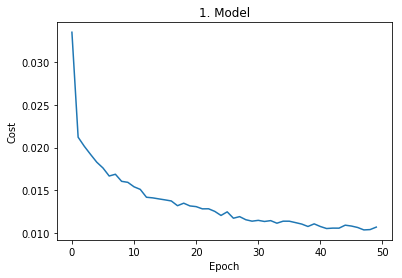

In [8]:
plt.plot(cost_3_layer_conv3)
plt.title('1. Model')
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [9]:
test_cost_3_layer_conv3_array = test_cost_3_layer_conv3.reshape(int(epoch), int(test_cost_3_layer_conv3.shape[0]/(epoch))).mean(axis=1)
print('1.Model cost: ', test_cost_3_layer_conv3_array)

1.Model cost:  [0.41337172 0.0232129  0.02148676 0.02086911 0.02166357 0.02190832
 0.01863599 0.02159869 0.02125717 0.02275631 0.0248996  0.03341357
 0.0386342  0.02051063 0.01982641 0.02810604 0.02667635 0.01859651
 0.06165837 0.01906182 0.02277531 0.0252082  0.01690359 0.0248793
 0.02377981 0.02566426 0.02177503 0.03239649 0.02039523 0.03879368
 0.02096415 0.02233708 0.01984499 0.01987033 0.02801825 0.02519932
 0.02326616 0.02190706 0.02874287 0.03211958 0.02354479 0.01815223
 0.01937058 0.02215992 0.02016388 0.02206465 0.01837069 0.02337319
 0.02681914 0.02276018]


Text(0,0.5,'Cost')

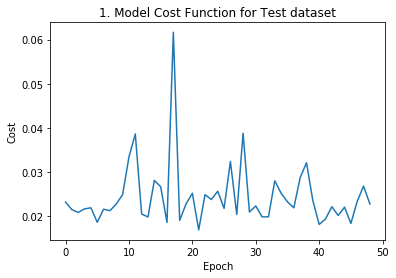

In [45]:
plt.plot(test_cost_3_layer_conv3_array[1:])
plt.title('1. Model Cost Function for Test dataset')
plt.xlabel('Epoch')
plt.ylabel('Cost')

0.0107343533862392


Text(0,0.5,'loss')

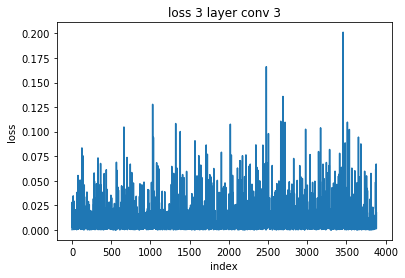

In [11]:
print(train_loss_3_layer_conv3[-int(train_loss_3_layer_conv3.shape[0]/50):].mean())
plt.plot(train_loss_3_layer_conv3[-int(train_loss_3_layer_conv3.shape[0]/50):])
plt.title('loss 3 layer conv 3')
plt.xlabel('index')
plt.ylabel('loss')

#### 2.Model(3 layers, kernel size 5)

In [12]:
# Optimizer and Loss Function
lr = 3e-4
net_3_layer_conv5 = Models.Net_3_layer(kernel = 5)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_3_layer_conv5.parameters(), lr)
train_loss_3_layer_conv5, test_cost_3_layer_conv5, train_label_3_layer_conv5, trained_net_3_layer_conv5 = train_model(epoch, net_3_layer_conv5)
torch.save(trained_net_3_layer_conv5.state_dict(), 'checkpoints/04model_3_layer_conv5.pt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training


In [13]:
cost_3_layer_conv5 = train_loss_3_layer_conv5.reshape(int(epoch), int(train_loss_3_layer_conv5.shape[0]/(epoch))).mean(axis=1)
cost_3_layer_conv5

array([0.04032025, 0.0261105 , 0.02488503, 0.02263732, 0.02104664,
       0.02004295, 0.02041094, 0.01973313, 0.01860258, 0.01844905,
       0.01786538, 0.01780888, 0.01700839, 0.01684253, 0.01647474,
       0.0162385 , 0.01587981, 0.01614634, 0.01492947, 0.01519123,
       0.01514717, 0.01454989, 0.01449542, 0.01407266, 0.01427704,
       0.01347086, 0.01373029, 0.01346813, 0.01311981, 0.01342054,
       0.01329356, 0.01298488, 0.01287518, 0.0129698 , 0.01275321,
       0.01291506, 0.01253192, 0.01261326, 0.01281897, 0.01237235,
       0.01248499, 0.01234993, 0.01250216, 0.01233334, 0.01251185,
       0.01194672, 0.01209607, 0.01200215, 0.01191006, 0.01211835])

Text(0,0.5,'Cost')

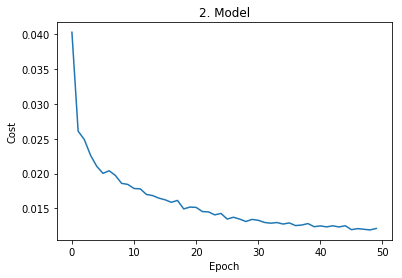

In [14]:
plt.plot(cost_3_layer_conv5)
plt.title('2. Model')
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [15]:
test_cost_3_layer_conv5_array = test_cost_3_layer_conv5.reshape(int(epoch), int(test_cost_3_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('2.Model cost: ', test_cost_3_layer_conv5_array)

2.Model cost:  [0.69384841 0.02413508 0.03167877 0.02323194 0.02787049 0.01924606
 0.02458718 0.02395486 0.03027586 0.02944944 0.02376825 0.02321094
 0.02229887 0.02886885 0.02478078 0.02075466 0.02026365 0.02136595
 0.02063518 0.02069945 0.01936036 0.01949979 0.02137018 0.02529822
 0.0223109  0.01837314 0.01940638 0.01715248 0.02636928 0.01992014
 0.02586477 0.01679043 0.0196442  0.02059449 0.02249678 0.02149011
 0.02137875 0.02251149 0.0187387  0.01898781 0.02199106 0.01938597
 0.031464   0.01691706 0.02054477 0.02261309 0.02228016 0.01681847
 0.01896319 0.01781306]


Text(0,0.5,'Cost')

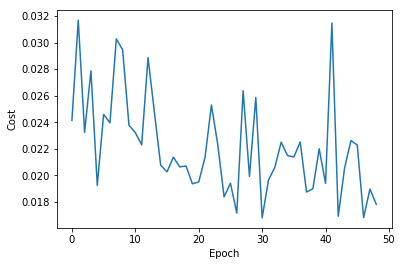

In [46]:
plt.plot(test_cost_3_layer_conv5_array[1:])
plt.xlabel('Epoch')
plt.ylabel('Cost')

0.01211835268554897


Text(0,0.5,'loss')

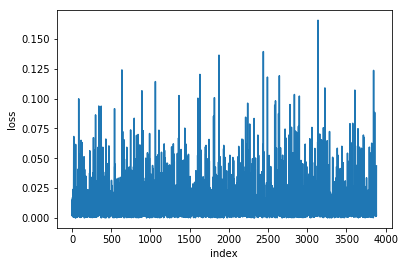

In [17]:
print(train_loss_3_layer_conv5[-int(train_loss_3_layer_conv5.shape[0]/50):].mean())
plt.plot(train_loss_3_layer_conv5[-int(train_loss_3_layer_conv5.shape[0]/50):])
# plt.title('loss 3 layer')
plt.xlabel('index')
plt.ylabel('loss')

### III. Training for 5 layer net

#### 3.Model(5 layers, kernel size 3)

In [18]:
# Optimizer and Loss Function
lr = 3e-4
net_5_layer_conv3 = Models.Net_5_layer(kernel = 3)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_5_layer_conv3.parameters(), lr)
train_loss_5_layer_conv3, test_cost_5_layer_conv3, train_label_5_layer_conv3, trained_net_5_layer_conv3 = train_model(epoch, net_5_layer_conv3)
#save weights
torch.save(trained_net_5_layer_conv3.state_dict(), 'checkpoints/05model_5_layer_conv3.pt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training


In [19]:
cost_5_layer_conv3 = train_loss_5_layer_conv3.reshape(int(epoch), int(train_loss_5_layer_conv3.shape[0]/(epoch))).mean(axis=1)
print('3.Model cost: ', cost_5_layer_conv3)

3.Model cost:  [0.02512727 0.0155916  0.01257756 0.0103771  0.00923001 0.00873649
 0.00799097 0.00760578 0.0070287  0.00674382 0.00647606 0.00605865
 0.0060589  0.00588327 0.00563101 0.0054766  0.00523584 0.00509679
 0.00506317 0.00495804 0.00484361 0.00457028 0.00460661 0.00447711
 0.0043141  0.00438374 0.00427935 0.00416043 0.00419048 0.00415207
 0.00398355 0.0041606  0.00418478 0.00408738 0.00393566 0.00410042
 0.00397373 0.0038827  0.00389817 0.00384579 0.00387076 0.00371671
 0.00372292 0.00373912 0.00376984 0.00373229 0.00380279 0.00354998
 0.00366959 0.00365353]


Text(0,0.5,'Cost')

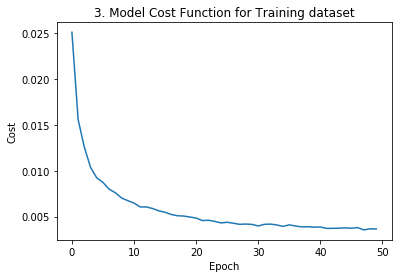

In [20]:
plt.plot(cost_5_layer_conv3)
plt.title('3. Model Cost Function for Training dataset')
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [21]:
test_cost_5_layer_conv3_array = test_cost_5_layer_conv3.reshape(int(epoch), int(test_cost_5_layer_conv3.shape[0]/(epoch))).mean(axis=1)
print('3.Model cost: ', test_cost_5_layer_conv3_array)

3.Model cost:  [0.54531519 0.0205717  0.01240506 0.01229645 0.01673428 0.01581182
 0.0086145  0.0089     0.00864087 0.01074789 0.0095542  0.00921826
 0.00894504 0.00836253 0.00874128 0.00852553 0.0083403  0.00983241
 0.00851629 0.00854426 0.00852832 0.00601005 0.00895477 0.00893888
 0.00902013 0.00893507 0.0062078  0.00916181 0.00708946 0.0066439
 0.00982073 0.00747106 0.00697914 0.00775627 0.00825237 0.00641337
 0.00631334 0.00946311 0.00683875 0.01114948 0.00756968 0.00758063
 0.00774917 0.00672729 0.00743629 0.01148382 0.0087743  0.00694923
 0.00752694 0.00771123]


Text(0,0.5,'Cost')

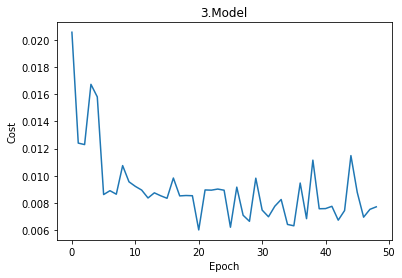

In [47]:
plt.plot(test_cost_5_layer_conv3_array[1:])
plt.title('3.Model')
plt.xlabel('Epoch')
plt.ylabel('Cost')

0.0036535308801166717


Text(0,0.5,'loss')

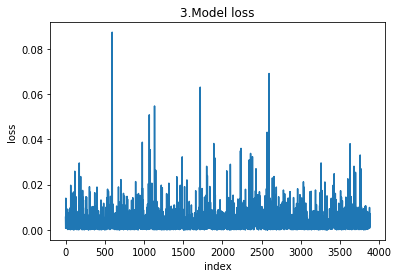

In [23]:
print(train_loss_5_layer_conv3[-int(train_loss_5_layer_conv3.shape[0]/50):].mean())
plt.plot(train_loss_5_layer_conv3[-int(train_loss_5_layer_conv3.shape[0]/50):])
plt.title('3.Model loss')
plt.xlabel('index')
plt.ylabel('loss')

#### 4.Model(5 layers, kernel size 5)

In [24]:
# Optimizer and Loss Function
lr = 3e-4
net_5_layer_conv5 = Models.Net_5_layer(kernel = 5)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_5_layer_conv5.parameters(), lr)
train_loss_5_layer_conv5, test_cost_5_layer_conv5, train_label_5_layer_conv5, trained_net_5_layer_conv5 = train_model(epoch, net_5_layer_conv5)
#save weights
torch.save(trained_net_5_layer_conv5.state_dict(), 'checkpoints/06model_5_layer_conv5.pt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training


In [25]:
cost_5_layer_conv5 = train_loss_5_layer_conv5.reshape(int(epoch), int(train_loss_5_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('4.Model cost: ', cost_5_layer_conv5)

4.Model cost:  [0.02602301 0.01464727 0.01166339 0.00964308 0.00908351 0.00811936
 0.00765184 0.00717579 0.00659522 0.00638568 0.00606126 0.00584235
 0.00582686 0.00581357 0.00560888 0.00519432 0.00540074 0.00503702
 0.00526764 0.00483581 0.00495785 0.00476952 0.00476618 0.00453535
 0.00456856 0.00447879 0.00457379 0.00423915 0.00433676 0.00435503
 0.00403153 0.00448589 0.00407014 0.00410921 0.00419406 0.00411196
 0.00403574 0.00402283 0.00403984 0.00430597 0.00397824 0.00390968
 0.00397347 0.00376789 0.00402599 0.00374255 0.00364843 0.00392346
 0.0037925  0.00369409]


Text(0,0.5,'Cost')

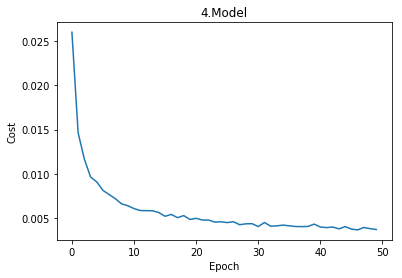

In [26]:
plt.plot(cost_5_layer_conv5)
plt.title('4.Model')
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [27]:
test_cost_5_layer_conv5_array = test_cost_5_layer_conv5.reshape(int(epoch), int(test_cost_5_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('4.Model cost: ', test_cost_5_layer_conv5_array)

4.Model cost:  [0.50380397 0.01930919 0.01251078 0.0151455  0.00846225 0.0083425
 0.00934458 0.0095897  0.01000688 0.00726489 0.00869671 0.00784128
 0.00924887 0.00857307 0.00808322 0.010051   0.00791333 0.00834911
 0.00776576 0.01390161 0.00841983 0.00726124 0.01094692 0.00670666
 0.00788551 0.006386   0.00843719 0.00819626 0.0098007  0.00732451
 0.00949101 0.00851562 0.00788698 0.00666994 0.00760405 0.01132673
 0.00806723 0.00693088 0.00722611 0.00780244 0.00808926 0.00861305
 0.00742673 0.00770043 0.00806522 0.00924461 0.007308   0.00744166
 0.00707529 0.00854617]


Text(0,0.5,'Cost')

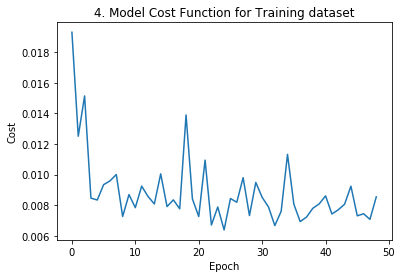

In [48]:
plt.plot(test_cost_5_layer_conv5[1:])
plt.title('4. Model Cost Function for Training dataset')
plt.xlabel('Epoch')
plt.ylabel('Cost')

0.0036940868548657373


Text(0,0.5,'loss')

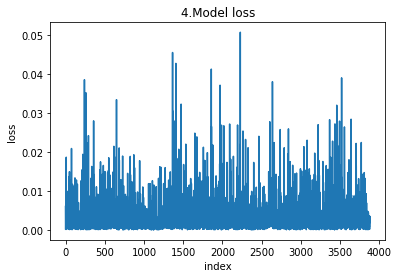

In [29]:
print(train_loss_5_layer_conv5[-int(train_loss_5_layer_conv5.shape[0]/50):].mean())
plt.plot(train_loss_5_layer_conv5[-int(train_loss_5_layer_conv5.shape[0]/50):])
plt.title('4.Model loss')
plt.xlabel('index')
plt.ylabel('loss')

#### 5.Model(7 layers, kernel size 5)

In [30]:
# Optimizer and Loss Function
lr = 3e-4
net_7_layer_conv5 = Models.Net_7_layer(kernel = 5)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_7_layer_conv5.parameters(), lr)
train_loss_7_layer_conv5, test_cost_7_layer_conv5, train_label_7_layer_conv5, trained_net_7_layer_conv5 = train_model(epoch, net_7_layer_conv5)
#save weights
torch.save(trained_net_7_layer_conv5.state_dict(), 'checkpoints/07model_7_layer_conv5.pt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training


In [31]:
cost_7_layer_conv5 = train_loss_7_layer_conv5.reshape(int(epoch), int(train_loss_7_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('5.Model cost: ', cost_7_layer_conv5)

5.Model cost:  [0.03049339 0.01400898 0.01000113 0.00833632 0.00766863 0.00660295
 0.00602927 0.00559773 0.00559683 0.00522641 0.0047616  0.00459378
 0.00440935 0.00439653 0.00414181 0.00390029 0.00372887 0.00385558
 0.00380957 0.00342702 0.00362217 0.00352457 0.00345643 0.00345194
 0.00318419 0.00326083 0.00323328 0.00314585 0.00316437 0.00310088
 0.00302544 0.00307849 0.0029775  0.00301292 0.00289997 0.00298094
 0.00282796 0.00292645 0.00289395 0.00292787 0.00285735 0.00282926
 0.00296023 0.0028174  0.00269164 0.00276528 0.00264137 0.00277473
 0.00271168 0.00266671]


Text(0,0.5,'Cost')

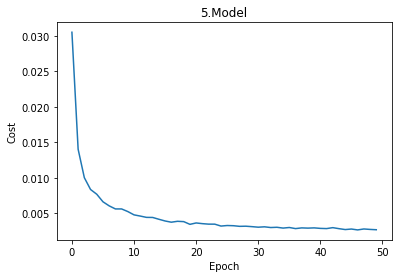

In [50]:
plt.plot(cost_7_layer_conv5)
plt.title('5.Model')
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [33]:
test_cost_7_layer_conv5_array = test_cost_7_layer_conv5.reshape(int(epoch), int(test_cost_7_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('5.Model cost: ', test_cost_7_layer_conv5_array)

5.Model cost:  [0.51165326 0.01468212 0.00850682 0.01341855 0.00989852 0.00884744
 0.01652512 0.01099534 0.01144294 0.00783393 0.00740829 0.00741113
 0.00745693 0.00772949 0.01219228 0.00642521 0.00935228 0.006395
 0.00768458 0.00715935 0.00572763 0.0064897  0.0092169  0.00614502
 0.00865255 0.00769404 0.00805774 0.00605833 0.00607306 0.00578828
 0.00612674 0.00625829 0.00676933 0.00642833 0.00637762 0.0065857
 0.00485402 0.00555687 0.00686541 0.00638949 0.00631165 0.00813088
 0.00646876 0.00554875 0.00595525 0.00669362 0.00890535 0.00685565
 0.00681801 0.00602503]


Text(0,0.5,'Cost')

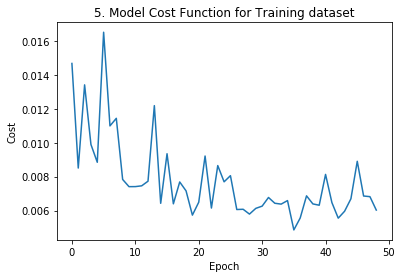

In [51]:
plt.plot(test_cost_7_layer_conv5_array[1:])
plt.title('5. Model Cost Function for Training dataset')
plt.xlabel('Epoch')
plt.ylabel('Cost')

0.0026667067329154783


Text(0,0.5,'loss')

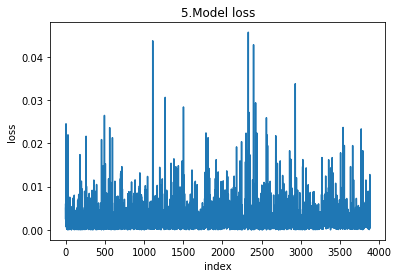

In [35]:
print(train_loss_7_layer_conv5[-int(train_loss_7_layer_conv5.shape[0]/50):].mean())
plt.plot(train_loss_7_layer_conv5[-int(train_loss_7_layer_conv5.shape[0]/50):])
plt.title('5.Model loss')
plt.xlabel('index')
plt.ylabel('loss')

#### 6.Model(9 layers, kernel size 5)

In [36]:
# Optimizer and Loss Function
lr = 3e-4
net_9_layer_conv5 = Models.Net_9_layer(kernel = 5)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_9_layer_conv5.parameters(), lr)
train_loss_9_layer_conv5, test_cost_9_layer_conv5, train_label_9_layer_conv5, trained_net_9_layer_conv5 = train_model(epoch, net_9_layer_conv5)
#save weights
torch.save(trained_net_9_layer_conv5.state_dict(), 'checkpoints/08model_9_layer_conv5.pt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Finished Training


In [37]:
cost_9_layer_conv5 = train_loss_9_layer_conv5.reshape(int(epoch), int(train_loss_9_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('6.Model cost: ', cost_9_layer_conv5)

6.Model cost:  [0.03006531 0.01363325 0.00887657 0.00732319 0.00655211 0.00608315
 0.00554894 0.00531576 0.00468387 0.00462683 0.00443744 0.00423072
 0.00406156 0.0040029  0.00364512 0.00329458 0.00321557 0.0032079
 0.00306656 0.00309229 0.00305593 0.00276448 0.00286533 0.00264246
 0.00266244 0.00241495 0.00268906 0.00252662 0.00238607 0.00236654
 0.00228012 0.00231394 0.00232461 0.00234717 0.00225253 0.00217679
 0.00227472 0.00229522 0.00212728 0.00219667 0.0020743  0.00203382
 0.0020895  0.00205616 0.00209611 0.00210391 0.00195946 0.00208083
 0.00199962 0.00192237]


Text(0,0.5,'Cost')

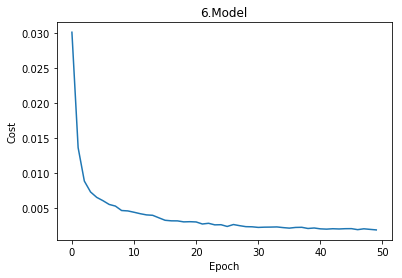

In [38]:
plt.plot(cost_9_layer_conv5)
plt.title('6.Model')
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [39]:
test_cost_9_layer_conv5_array = test_cost_9_layer_conv5.reshape(int(epoch), int(test_cost_9_layer_conv5.shape[0]/(epoch))).mean(axis=1)
print('6.Model cost: ', test_cost_9_layer_conv5_array)

6.Model cost:  [0.49571189 0.01610166 0.00928781 0.00851246 0.01032499 0.0070582
 0.01024622 0.00545937 0.0064741  0.00591169 0.00546732 0.00639814
 0.0047323  0.00492303 0.00451833 0.00571954 0.0064801  0.00515461
 0.00778794 0.00570394 0.00520411 0.00541339 0.00499983 0.00558686
 0.00653634 0.00508409 0.00550327 0.00510981 0.00524881 0.00552824
 0.00623417 0.00629477 0.00483692 0.00782636 0.00503051 0.00638641
 0.00553623 0.00700971 0.0061936  0.00673777 0.00580354 0.00467211
 0.00752384 0.0051573  0.00516751 0.00655693 0.00654959 0.00768337
 0.00562777 0.00565513]


Text(0,0.5,'Cost')

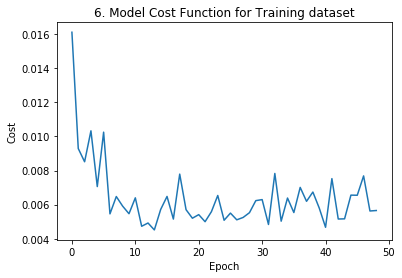

In [52]:
plt.plot(test_cost_9_layer_conv5_array[1:])
plt.title('6. Model Cost Function for Training dataset')
plt.xlabel('Epoch')
plt.ylabel('Cost')

0.0019223709434652238


Text(0,0.5,'loss')

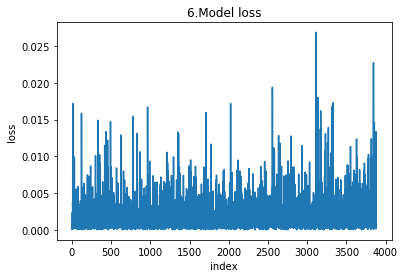

In [41]:
print(train_loss_9_layer_conv5[-int(train_loss_9_layer_conv5.shape[0]/50):].mean())
plt.plot(train_loss_9_layer_conv5[-int(train_loss_9_layer_conv5.shape[0]/50):])
plt.title('6.Model loss')
plt.xlabel('index')
plt.ylabel('loss')

## Random Parameters Distribution

In [42]:
 def show_parameters_on_hist(parameter):
    x = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 4))
    # 1 row, 3 columns

    plt.subplot(1, 3, 1)
    plt.xlabel("Value of Brightness")
    plt.ylabel("Frequency")
    plt.title("Frequency of Brightness")
    plt.hist(parameter[:, 0], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(1, 3, 2)
    plt.xlabel("Value of Contrast")
    plt.title("Frequency of Contrast")
    plt.hist(parameter[:, 1], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(1, 3, 3)
    plt.xlabel("Value of Hue")
    plt.title("Frequency of Hue")
    plt.hist(parameter[:, 2], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.show()

/Users/yanyu/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


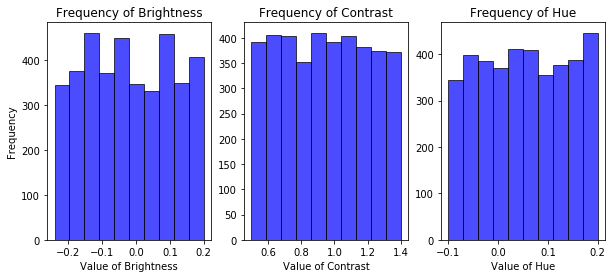

In [43]:
show_parameters_on_hist(train_parameter)

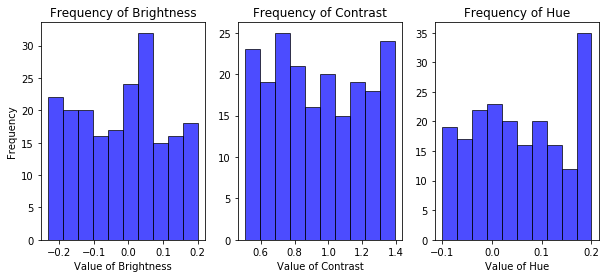

In [44]:
show_parameters_on_hist(test_parameter)